<a href="https://colab.research.google.com/github/ukishore33/Building-Machine-learning-pipeline-start-up-acquisition-dataset/blob/main/Startup_Data_Analysis_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

sns.set()
warnings.filterwarnings('ignore')

## Reading Dataset

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/Data Science Projects/Violavizn/companies_cleaned.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train

,status,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,...,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_Other,country_code_USA,isClosed,active_days
0,Operating,2007,2010.278158,2010.838703,1.42538,4.561781e+06,2009.507154,2010.08394,1.35679,2.000000,...,0,0,0,0,0,0,1,0,1,0.038356
1,Operating,2008,2010.278158,2010.838703,1.42538,4.561781e+06,2009.507154,2010.08394,1.35679,3.890691,...,0,0,0,1,0,0,0,0,1,0.035616
2,Operating,2008,2010.278158,2010.838703,1.42538,4.561781e+06,2008.000000,2008.00000,1.00000,2.000000,...,0,0,0,0,0,0,0,1,1,0.035616
3,Non Operating,2007,2008.000000,2008.000000,1.00000,5.000000e+06,2008.000000,2012.00000,3.00000,14.000000,...,0,0,0,0,0,0,0,1,0,-5.498630
4,Operating,2008,2010.278158,2010.838703,1.42538,4.561781e+06,2008.000000,2008.00000,1.00000,3.000000,...,0,0,0,0,0,0,0,1,1,0.035616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60013,Operating,2007,2010.278158,2010.838703,1.42538,4.561781e+06,2013.000000,2013.00000,2.00000,5.000000,...,0,0,0,0,0,0,0,1,1,0.038356
60014,Operating,2007,2008.000000,2008.000000,1.00000,7.500000e+05,2013.000000,2013.00000,1.00000,14.000000,...,0,0,0,0,0,0,0,1,1,0.038356
60015,Operating,1959,2010.278158,2010.838703,1.42538,4.561781e+06,2012.000000,2013.00000,3.00000,44.000000,...,0,0,0,0,0,0,0,1,1,0.169863
60016,Operating,2008,2010.278158,2010.838703,1.42538,4.561781e+06,2009.507154,2010.08394,1.35679,1.000000,...,0,0,0,0,0,0,0,1,1,0.035616


In [ ]:
df_train.describe()

,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,...,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_Other,country_code_USA,isClosed,active_days
count,60018.000000,60018.000000,60018.000000,60018.000000,6.001800e+04,60018.000000,60018.000000,60018.000000,60018.000000,60018.000000,...,60018.000000,60018.000000,60018.000000,60018.000000,60018.000000,60018.000000,60018.000000,60018.000000,60018.000000,60018.000000
mean,2005.537439,2010.278158,2010.838703,1.425380,4.561781e+06,2009.507154,2010.083940,1.356790,3.890691,37.205997,...,0.014662,0.020427,0.082625,0.049768,0.012730,0.010880,0.161352,0.564331,0.916592,-0.277711
std,9.802670,1.522990,1.437125,0.374365,3.333028e+06,3.006082,2.903148,0.487714,11.288162,15.794162,...,0.120198,0.141458,0.275317,0.217468,0.112106,0.103739,0.367858,0.495848,0.276501,1.287708
min,1901.000000,1960.000000,1960.000000,1.000000,2.910000e+02,1960.000000,1960.000000,1.000000,1.000000,-50.942326,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.515068
25%,2004.000000,2010.278158,2010.838703,1.425380,4.561781e+06,2009.507154,2010.083940,1.000000,2.000000,34.052234,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.027397
50%,2008.000000,2010.278158,2010.838703,1.425380,4.561781e+06,2009.507154,2010.083940,1.356790,3.000000,39.058745,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.032877
75%,2011.000000,2010.278158,2010.838703,1.425380,4.561781e+06,2011.000000,2011.000000,1.356790,3.890691,44.977753,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.043836
max,2014.000000,2013.000000,2013.000000,3.000000,2.922000e+07,2014.000000,2014.000000,7.000000,1189.000000,77.553604,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.328767


## Analyze And Visualize The Data

Exploratory Data Analysis (EDA):

Exploratory Data Analysis (EDA) is a crucial step in the machine learning pipeline that involves analyzing and visualizing the data before applying any modeling techniques. The primary goal of EDA is to gain insights, identify patterns, relationships, anomalies, and understand the characteristics of the dataset
It can reveal insights like the distribution of item types, outlet types, outlet sizes, and more.
Estimating the average sales across different categories can provide initial insights into which factors might impact sales the most.
Correlation analysis can help understand relationships between numerical variables.

In [ ]:
# getting categorical and numerical columns
categorical_cols = df_train.select_dtypes(exclude='number').columns.to_list()
numerical_cols = df_train.select_dtypes(include='number').columns.to_list()

print('Categorical Columns: ', categorical_cols)
print('Numerical Columns: ', numerical_cols)

Categorical Columns:  ['status']
Numerical Columns:  ['founded_at', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'category_code_advertising', 'category_code_biotech', 'category_code_consulting', 'category_code_ecommerce', 'category_code_education', 'category_code_enterprise', 'category_code_games_video', 'category_code_hardware', 'category_code_mobile', 'category_code_network_hosting', 'category_code_other', 'category_code_public_relations', 'category_code_search', 'category_code_software', 'category_code_web', 'country_code_AUS', 'country_code_CAN', 'country_code_DEU', 'country_code_ESP', 'country_code_FRA', 'country_code_GBR', 'country_code_IND', 'country_code_ISR', 'country_code_NLD', 'country_code_Other', 'country_code_USA', 'isClosed', 'active_days']


In [ ]:
columns_to_drop = [
    'category_code_advertising',
    'category_code_biotech',
    'category_code_consulting',
    'category_code_ecommerce',
    'category_code_education',
    'category_code_enterprise',
    'category_code_games_video',
    'category_code_hardware',
    'category_code_mobile',
    'category_code_network_hosting',
    'category_code_other',
    'category_code_public_relations',
    'category_code_search',
    'category_code_software',
    'category_code_web',
    'country_code_AUS',
    'country_code_CAN',
    'country_code_DEU',
    'country_code_ESP',
    'country_code_FRA',
    'country_code_GBR',
    'country_code_IND',
    'country_code_ISR',
    'country_code_NLD',
    'country_code_Other',
    'country_code_USA'
]

df_train_excluded = df_train.drop(columns=columns_to_drop)


In [ ]:
df_train_excluded = df_train_excluded.drop(columns='status')

### Univariate Analysis

#### Hist Plot

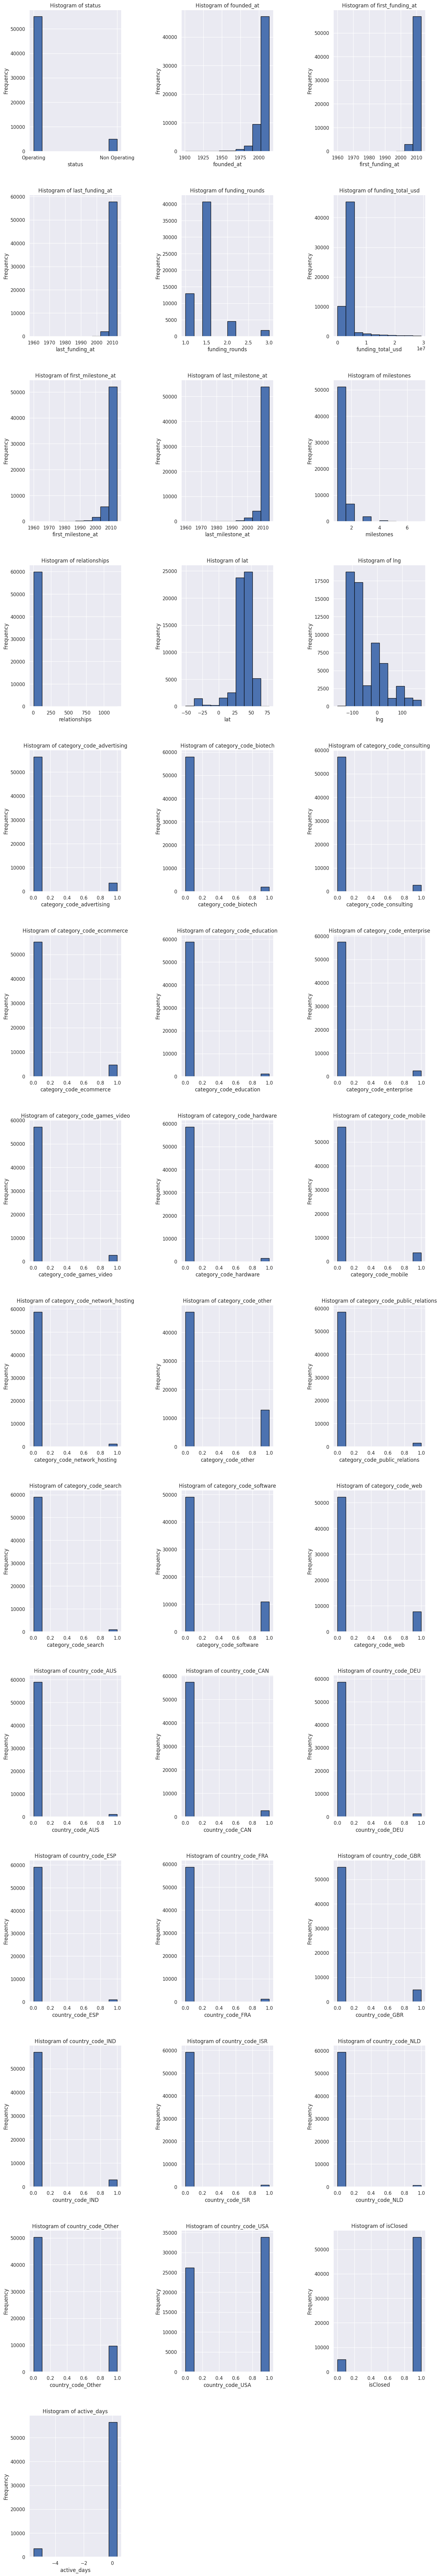

In [ ]:
plt.figure(figsize=[15, 90])
for idx,column in enumerate(df_train,start=1):
  plt.subplot(15,3,idx)
  plt.hist(df_train[column], bins=10, edgecolor='black')
  plt.xlabel(f'{column}')
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {column}')
  plt.tight_layout(pad=4)
plt.show()

- more than 50000 companies are operating and almost 5000 companies are non operating.
- post 2000 most of the companies are founded
- most of the companies are got their first funding and last funding in the year 2010
-

### Numerical Columns

#### Violin Plot

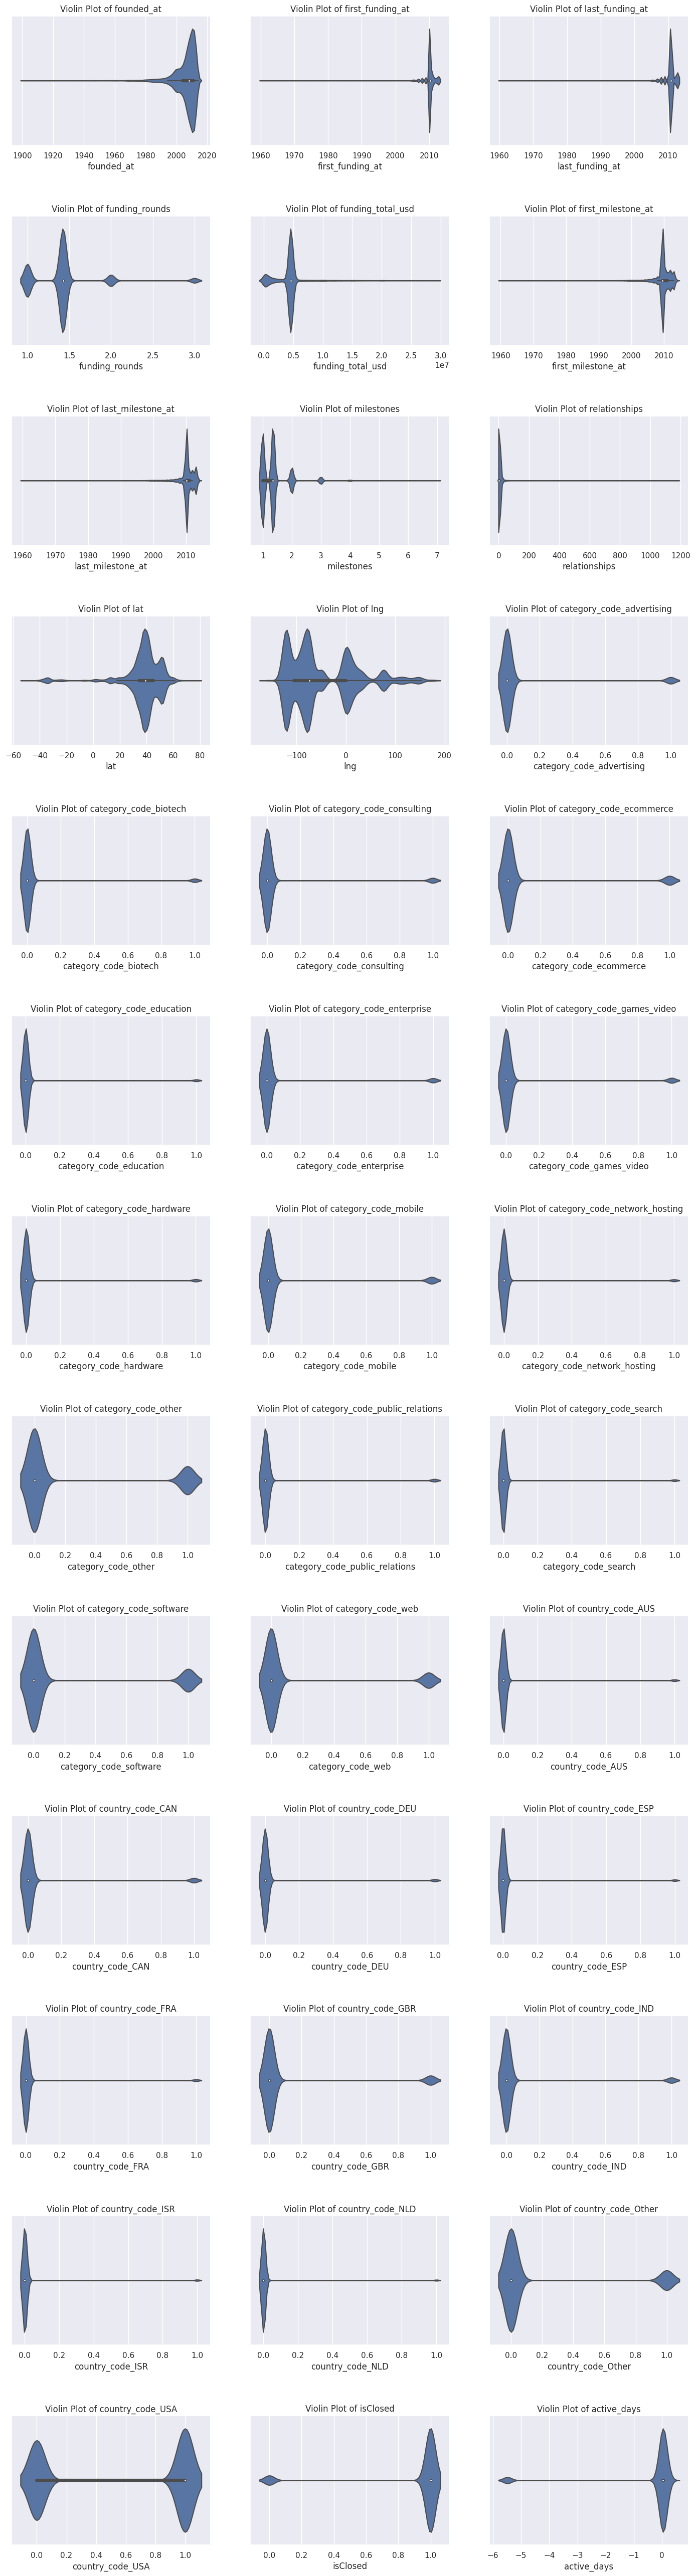

In [ ]:
plt.figure(figsize=[15, 60])
for idx,column in enumerate(numerical_cols,start=1):
  plt.subplot(15,3,idx)
  sns.violinplot(x=df_train[column])
  plt.xlabel(f'{column}')
  plt.title(f'Violin Plot of {column}')
  plt.tight_layout(pad=4)
plt.show()

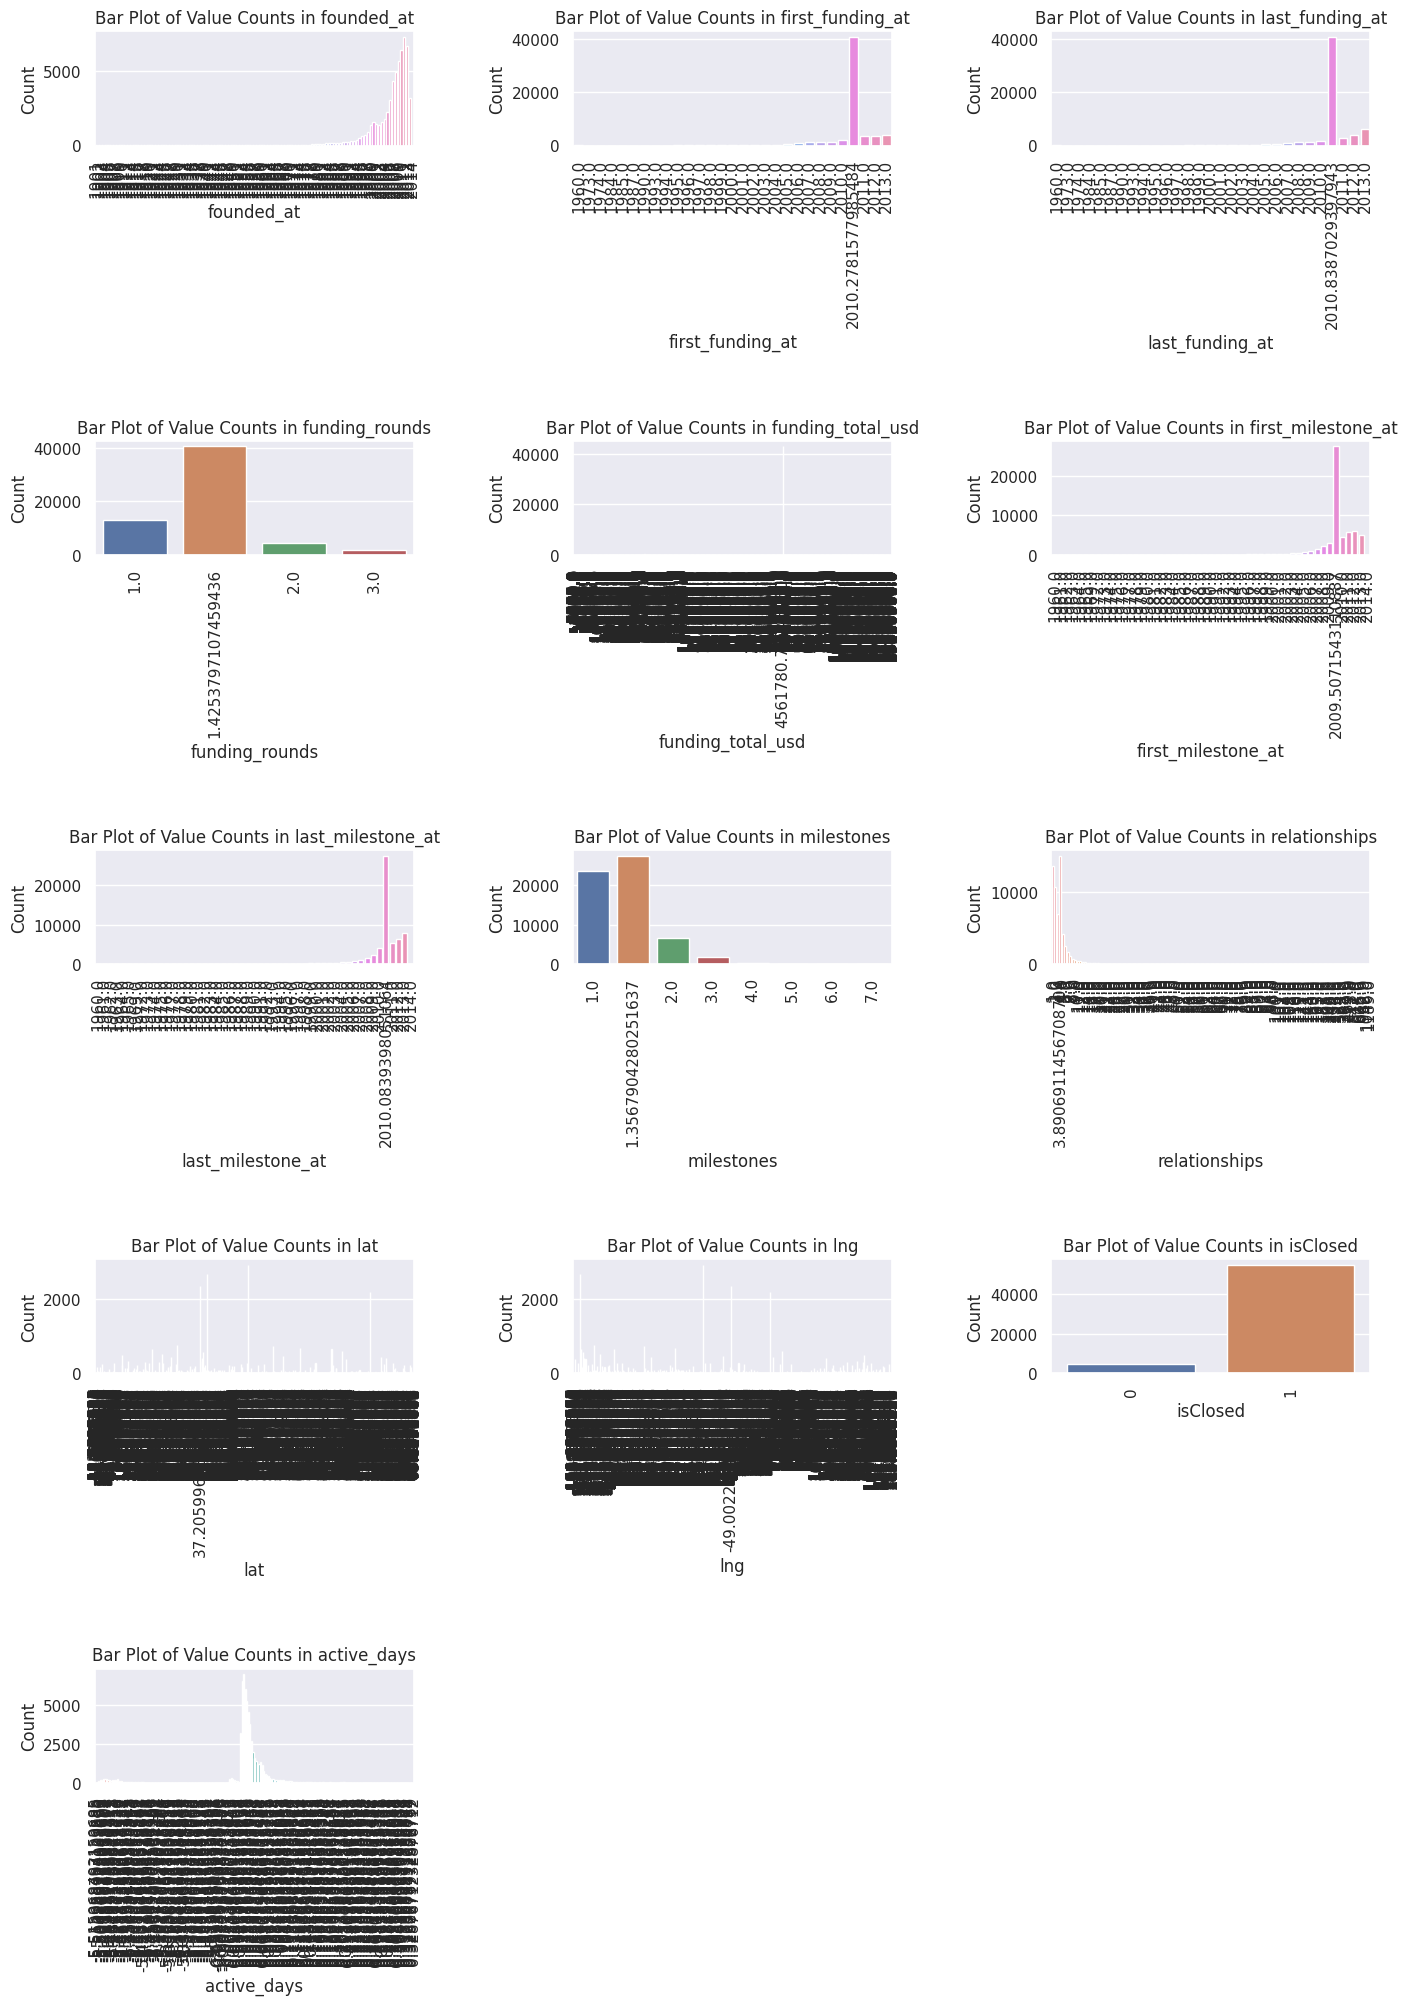

In [ ]:
plt.figure(figsize=[15, 60])
for idx,column in enumerate(df_train_excluded,start=1):
  plt.subplot(15,3,idx)
  value_counts = df_train[column].value_counts().sort_index()
  sns.barplot(x=value_counts.index, y=value_counts.values)
  plt.xlabel(f'{column}')
  plt.ylabel('Count')
  plt.title(f'Bar Plot of Value Counts in {column}')
  plt.xticks(rotation=90)
  plt.tight_layout(pad=4)
plt.show()

#### Sampled Hist Plot

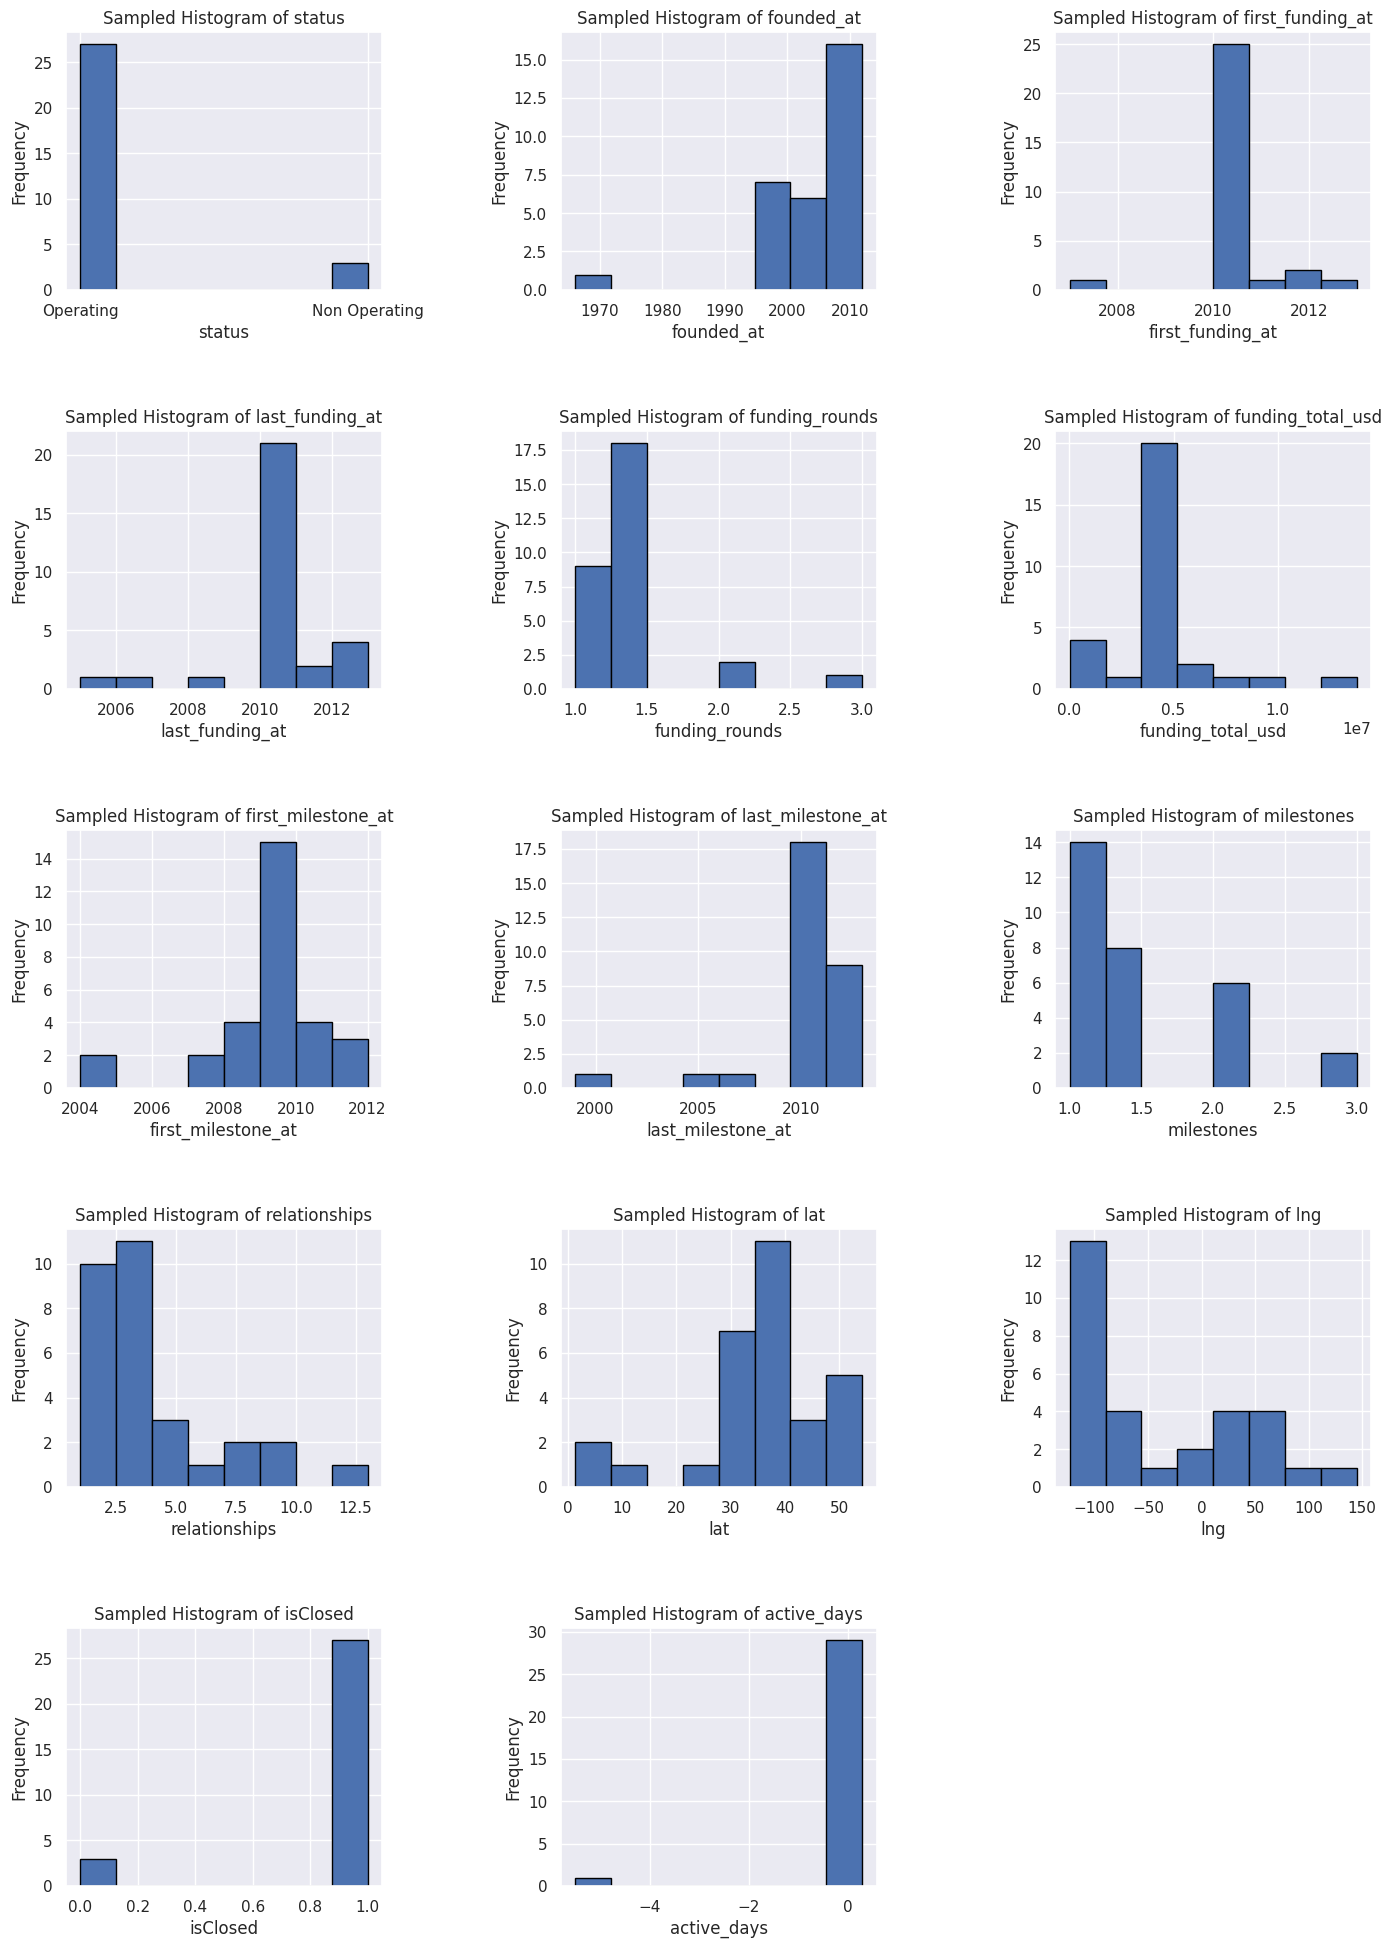

In [ ]:
plt.figure(figsize=[15, 60])
for idx,column in enumerate(df_train_excluded,start=1):
  plt.subplot(15,3,idx)
  sample_size = 30  # Number of data points to sample
  sampled_data = df_train[column].sample(sample_size)
  plt.hist(sampled_data, bins=8, edgecolor='black')
  plt.xlabel(f'{column}')
  plt.ylabel('Frequency')
  plt.title(f'Sampled Histogram of {column}')
  plt.tight_layout(pad=4)
plt.show()

#### KDE and Rug Plot

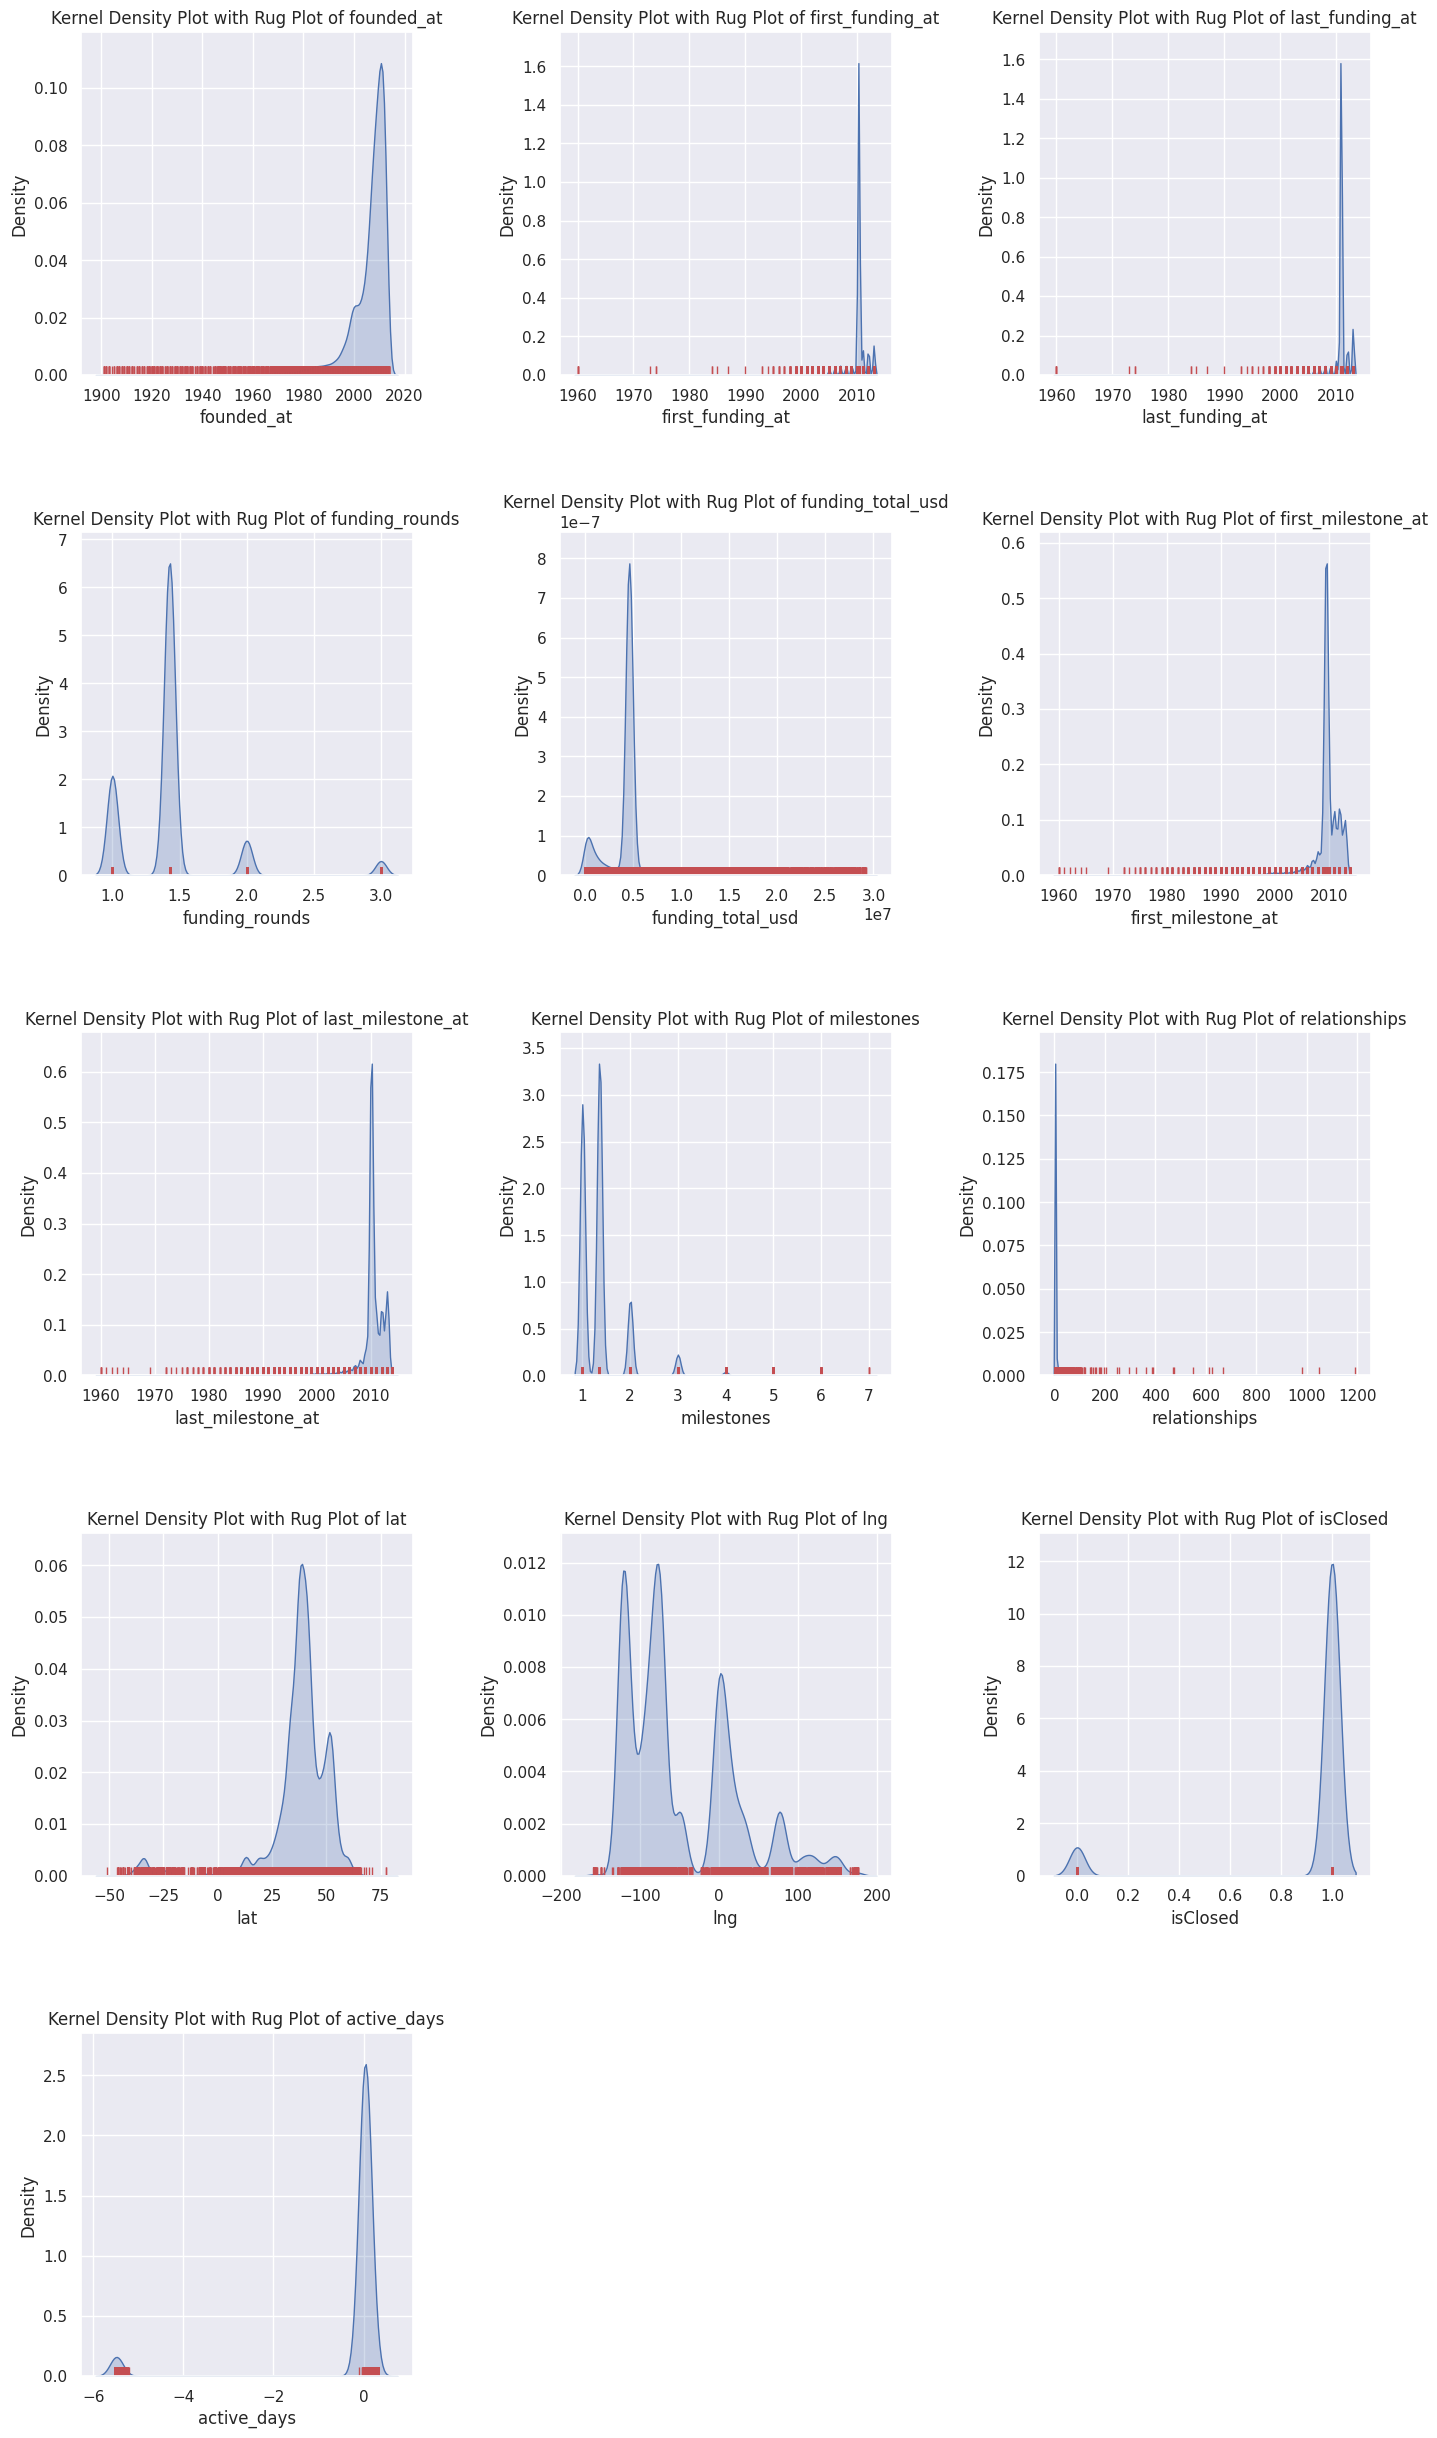

In [ ]:
plt.figure(figsize=[15, 30])
for idx,column in enumerate(df_train_excluded,start=1):
  plt.subplot(6,3,idx)
  sns.kdeplot(df_train[f'{column}'], shade=True)
  sns.rugplot(df_train[f'{column}'], color='r')
  plt.xlabel(f'{column}')
  plt.ylabel('Density')
  plt.title(f'Kernel Density Plot with Rug Plot of {column}')
  plt.tight_layout(pad=4)
plt.show()

### Bivariate Analysis

#### Correlation graph with Heat Map data

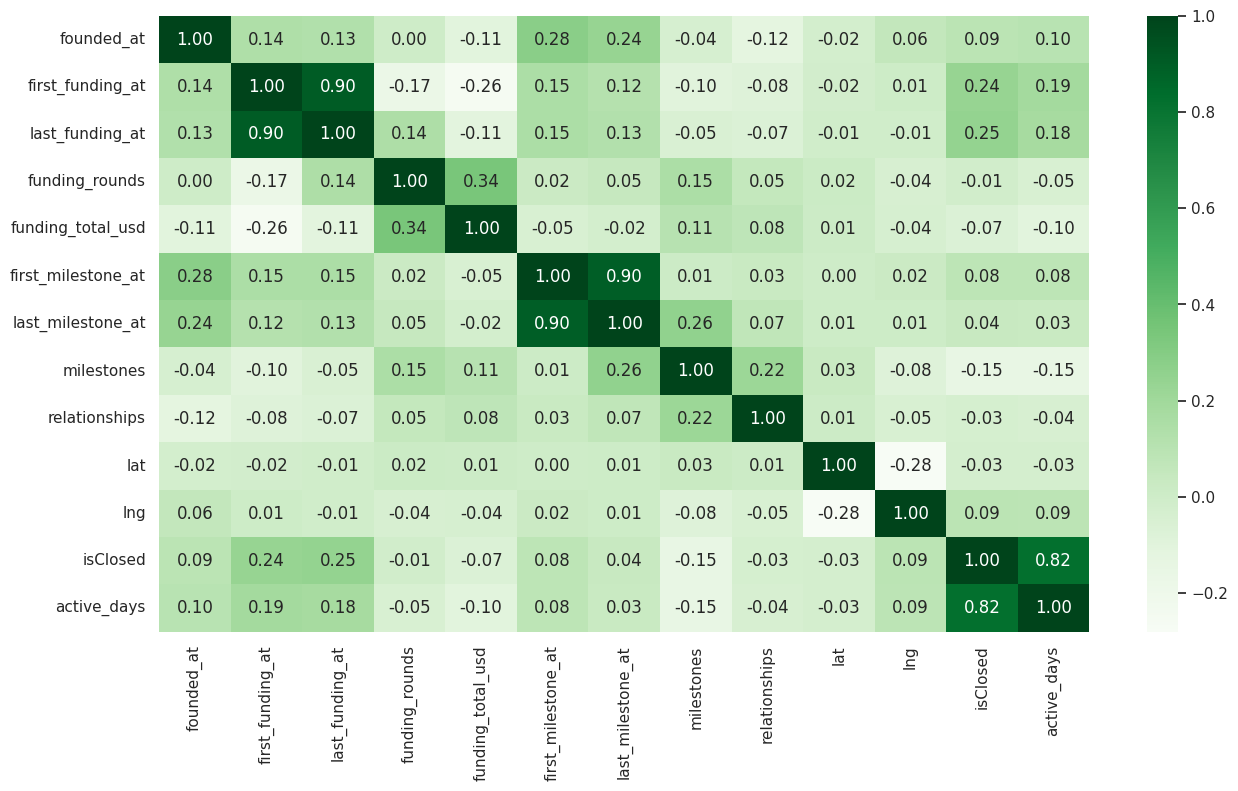

In [ ]:
corr_df=df_train_excluded.corr()
plt.figure(figsize = (15,8))
sns.heatmap(data = corr_df, annot = True, cmap = "Greens", cbar = True, fmt='.2f')
plt.show()

#### Scatter Plot

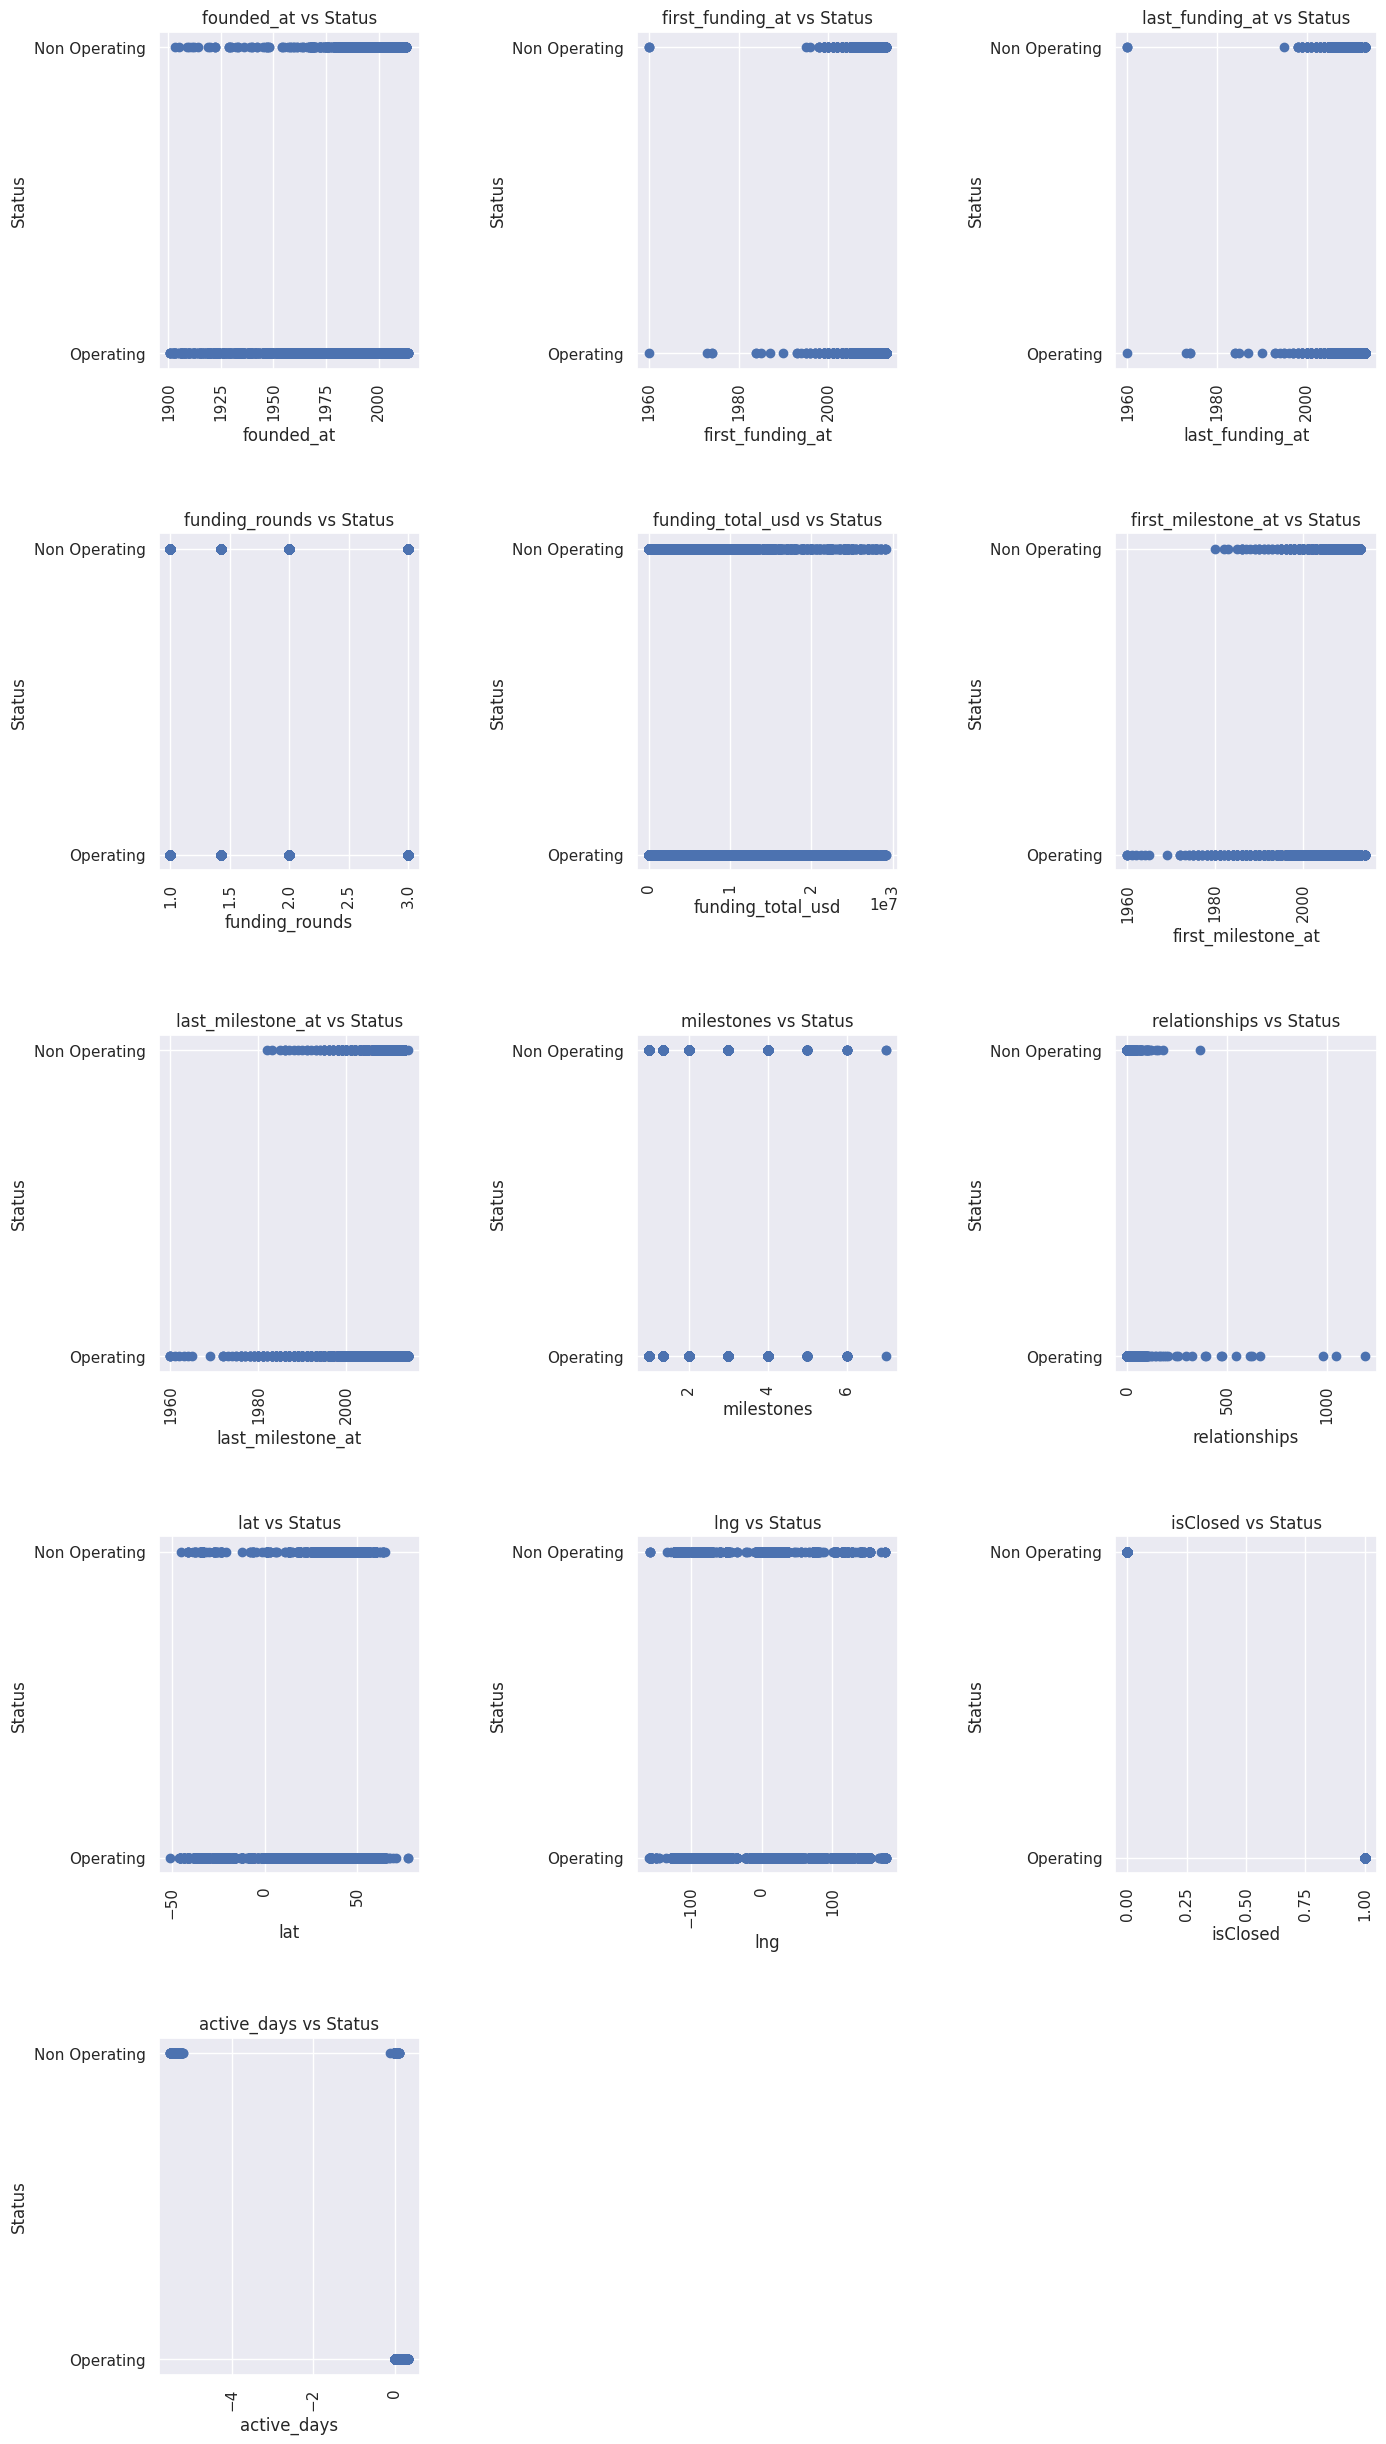

In [ ]:
#create scatterplot of hours vs. score
plt.figure(figsize=[15, 30])
for idx, column in enumerate(df_train_excluded, start=1):
  plt.subplot(6, 3, idx)
  plt.scatter(df_train[column], df_train['status'])
  plt.title(f'{column} vs Status')
  plt.xlabel(f'{column}')
  plt.ylabel('Status')
  plt.xticks(rotation=90)
  plt.tight_layout(pad=4)
plt.show()

#### Bar Plot

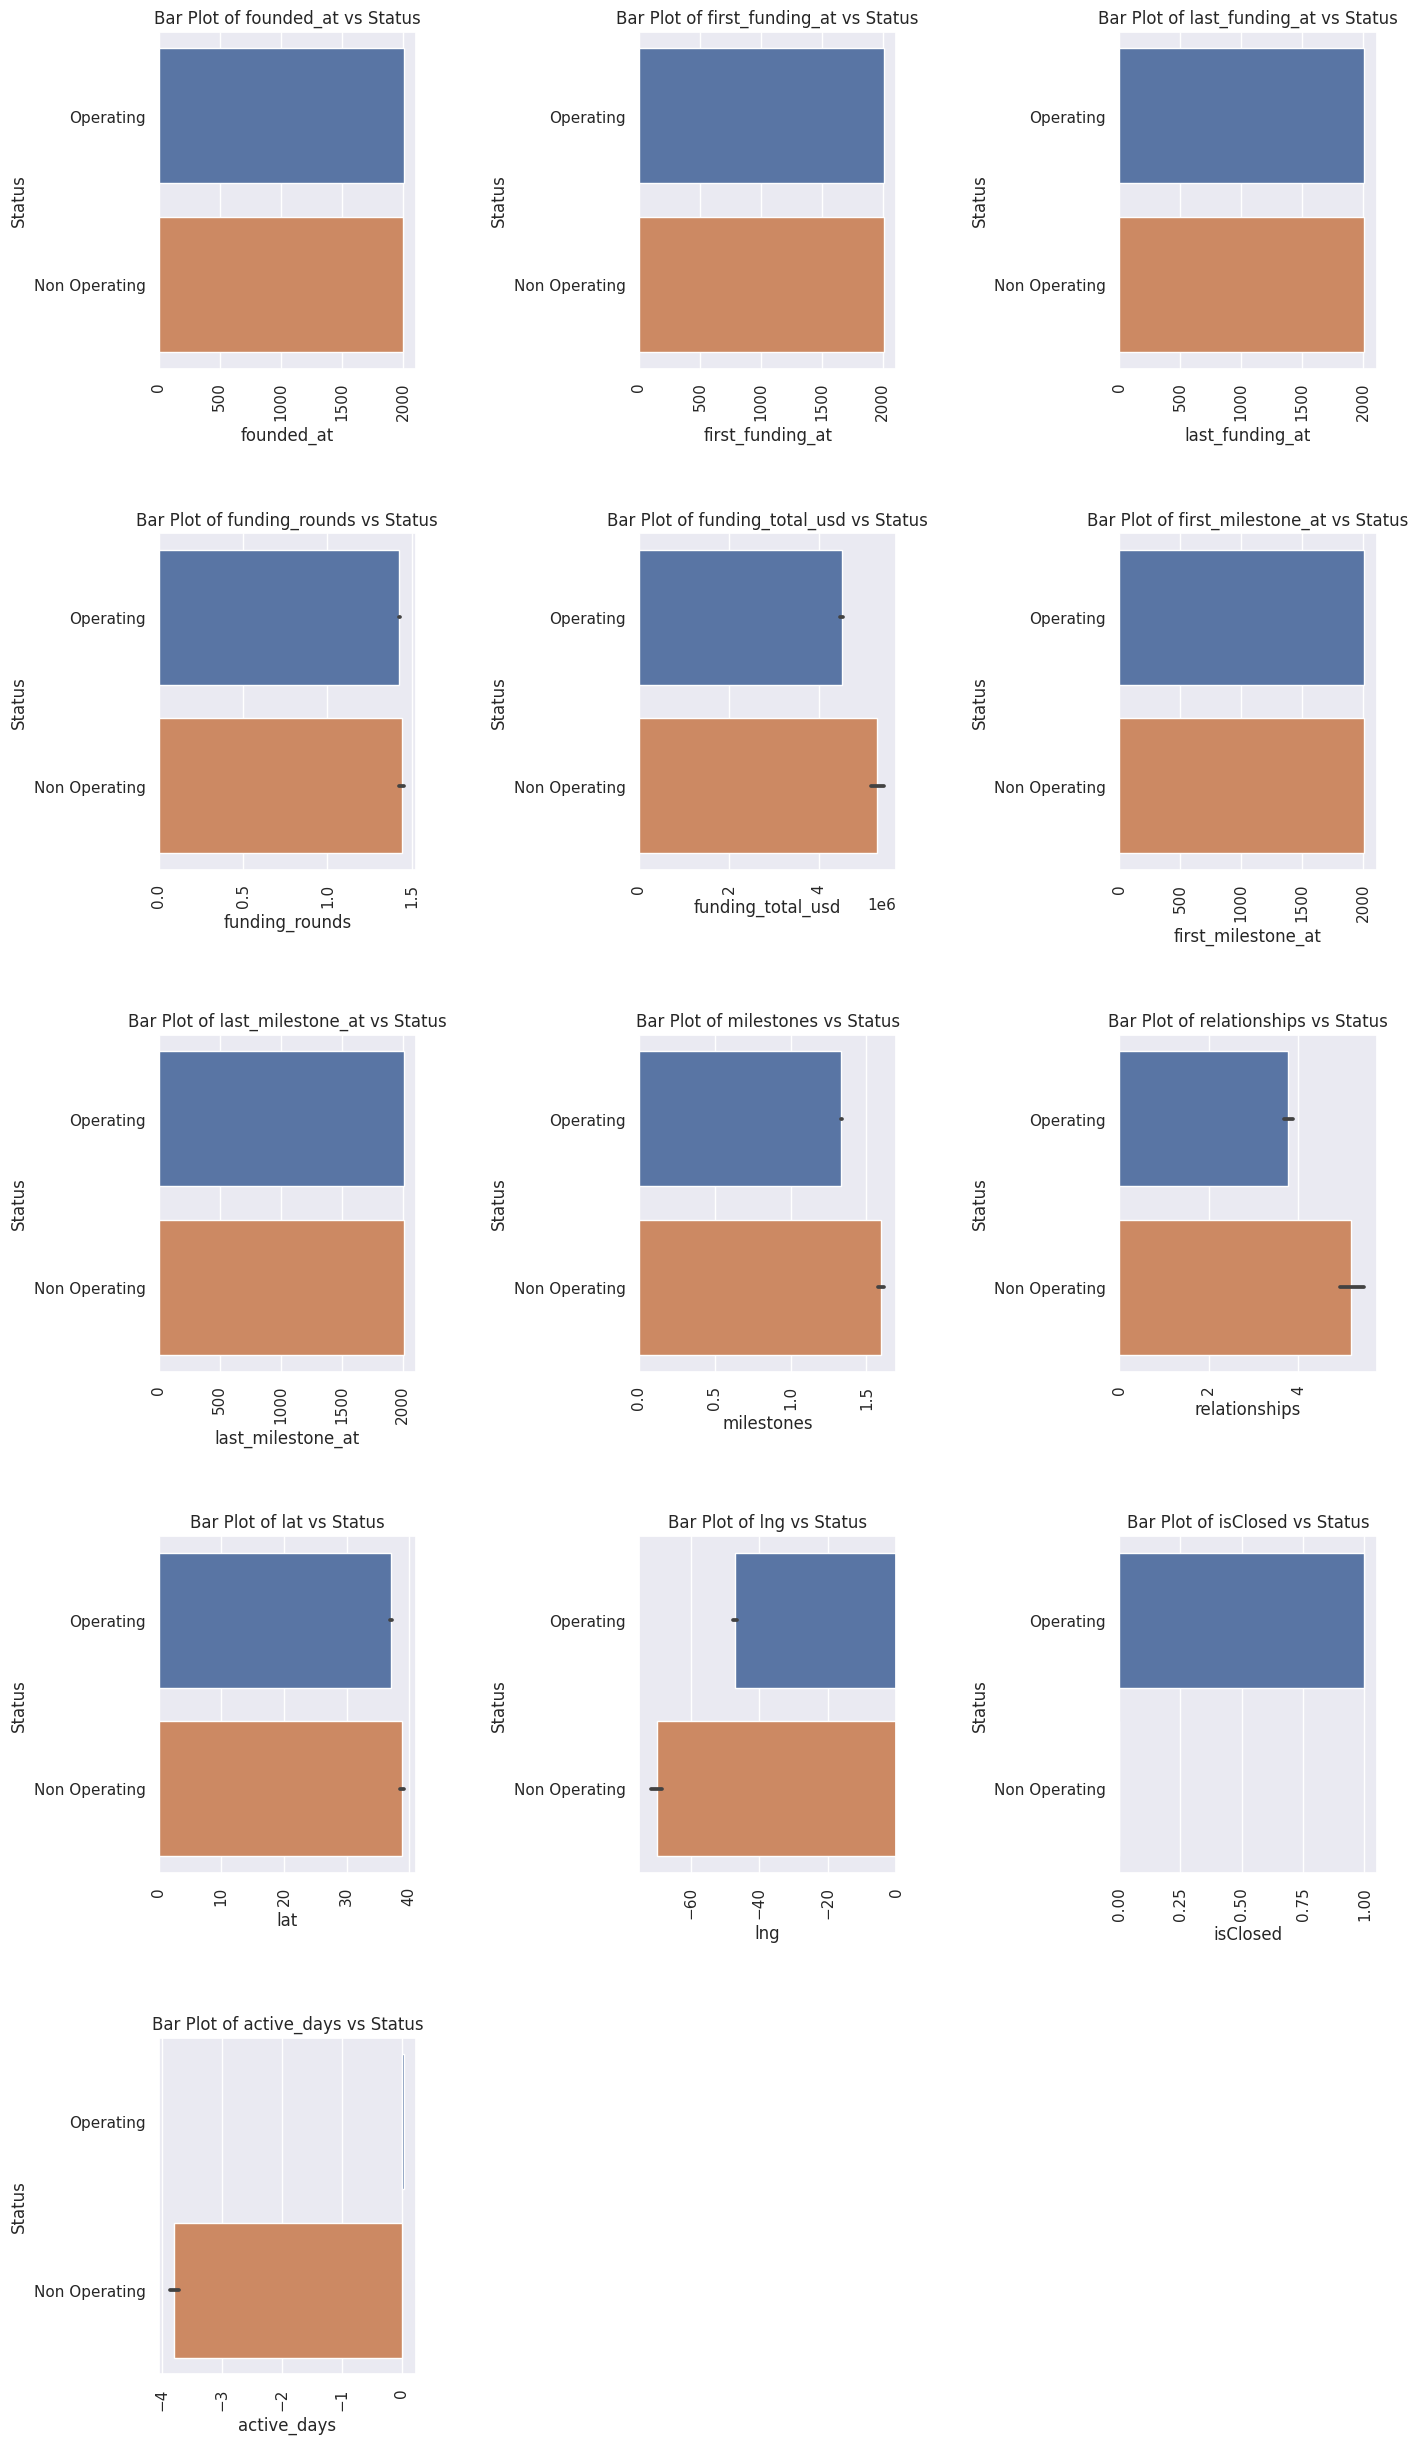

In [ ]:
plt.figure(figsize=[15, 30])
for idx, column in enumerate(df_train_excluded, start=1):
  plt.subplot(6, 3, idx)
  sns.barplot(x=df_train[column], y=df_train['status'])
  plt.xlabel(f'{column}')
  plt.ylabel('Status')
  plt.title(f'Bar Plot of {column} vs Status')
  plt.xticks(rotation=90)
  plt.tight_layout(pad=4)
plt.show()

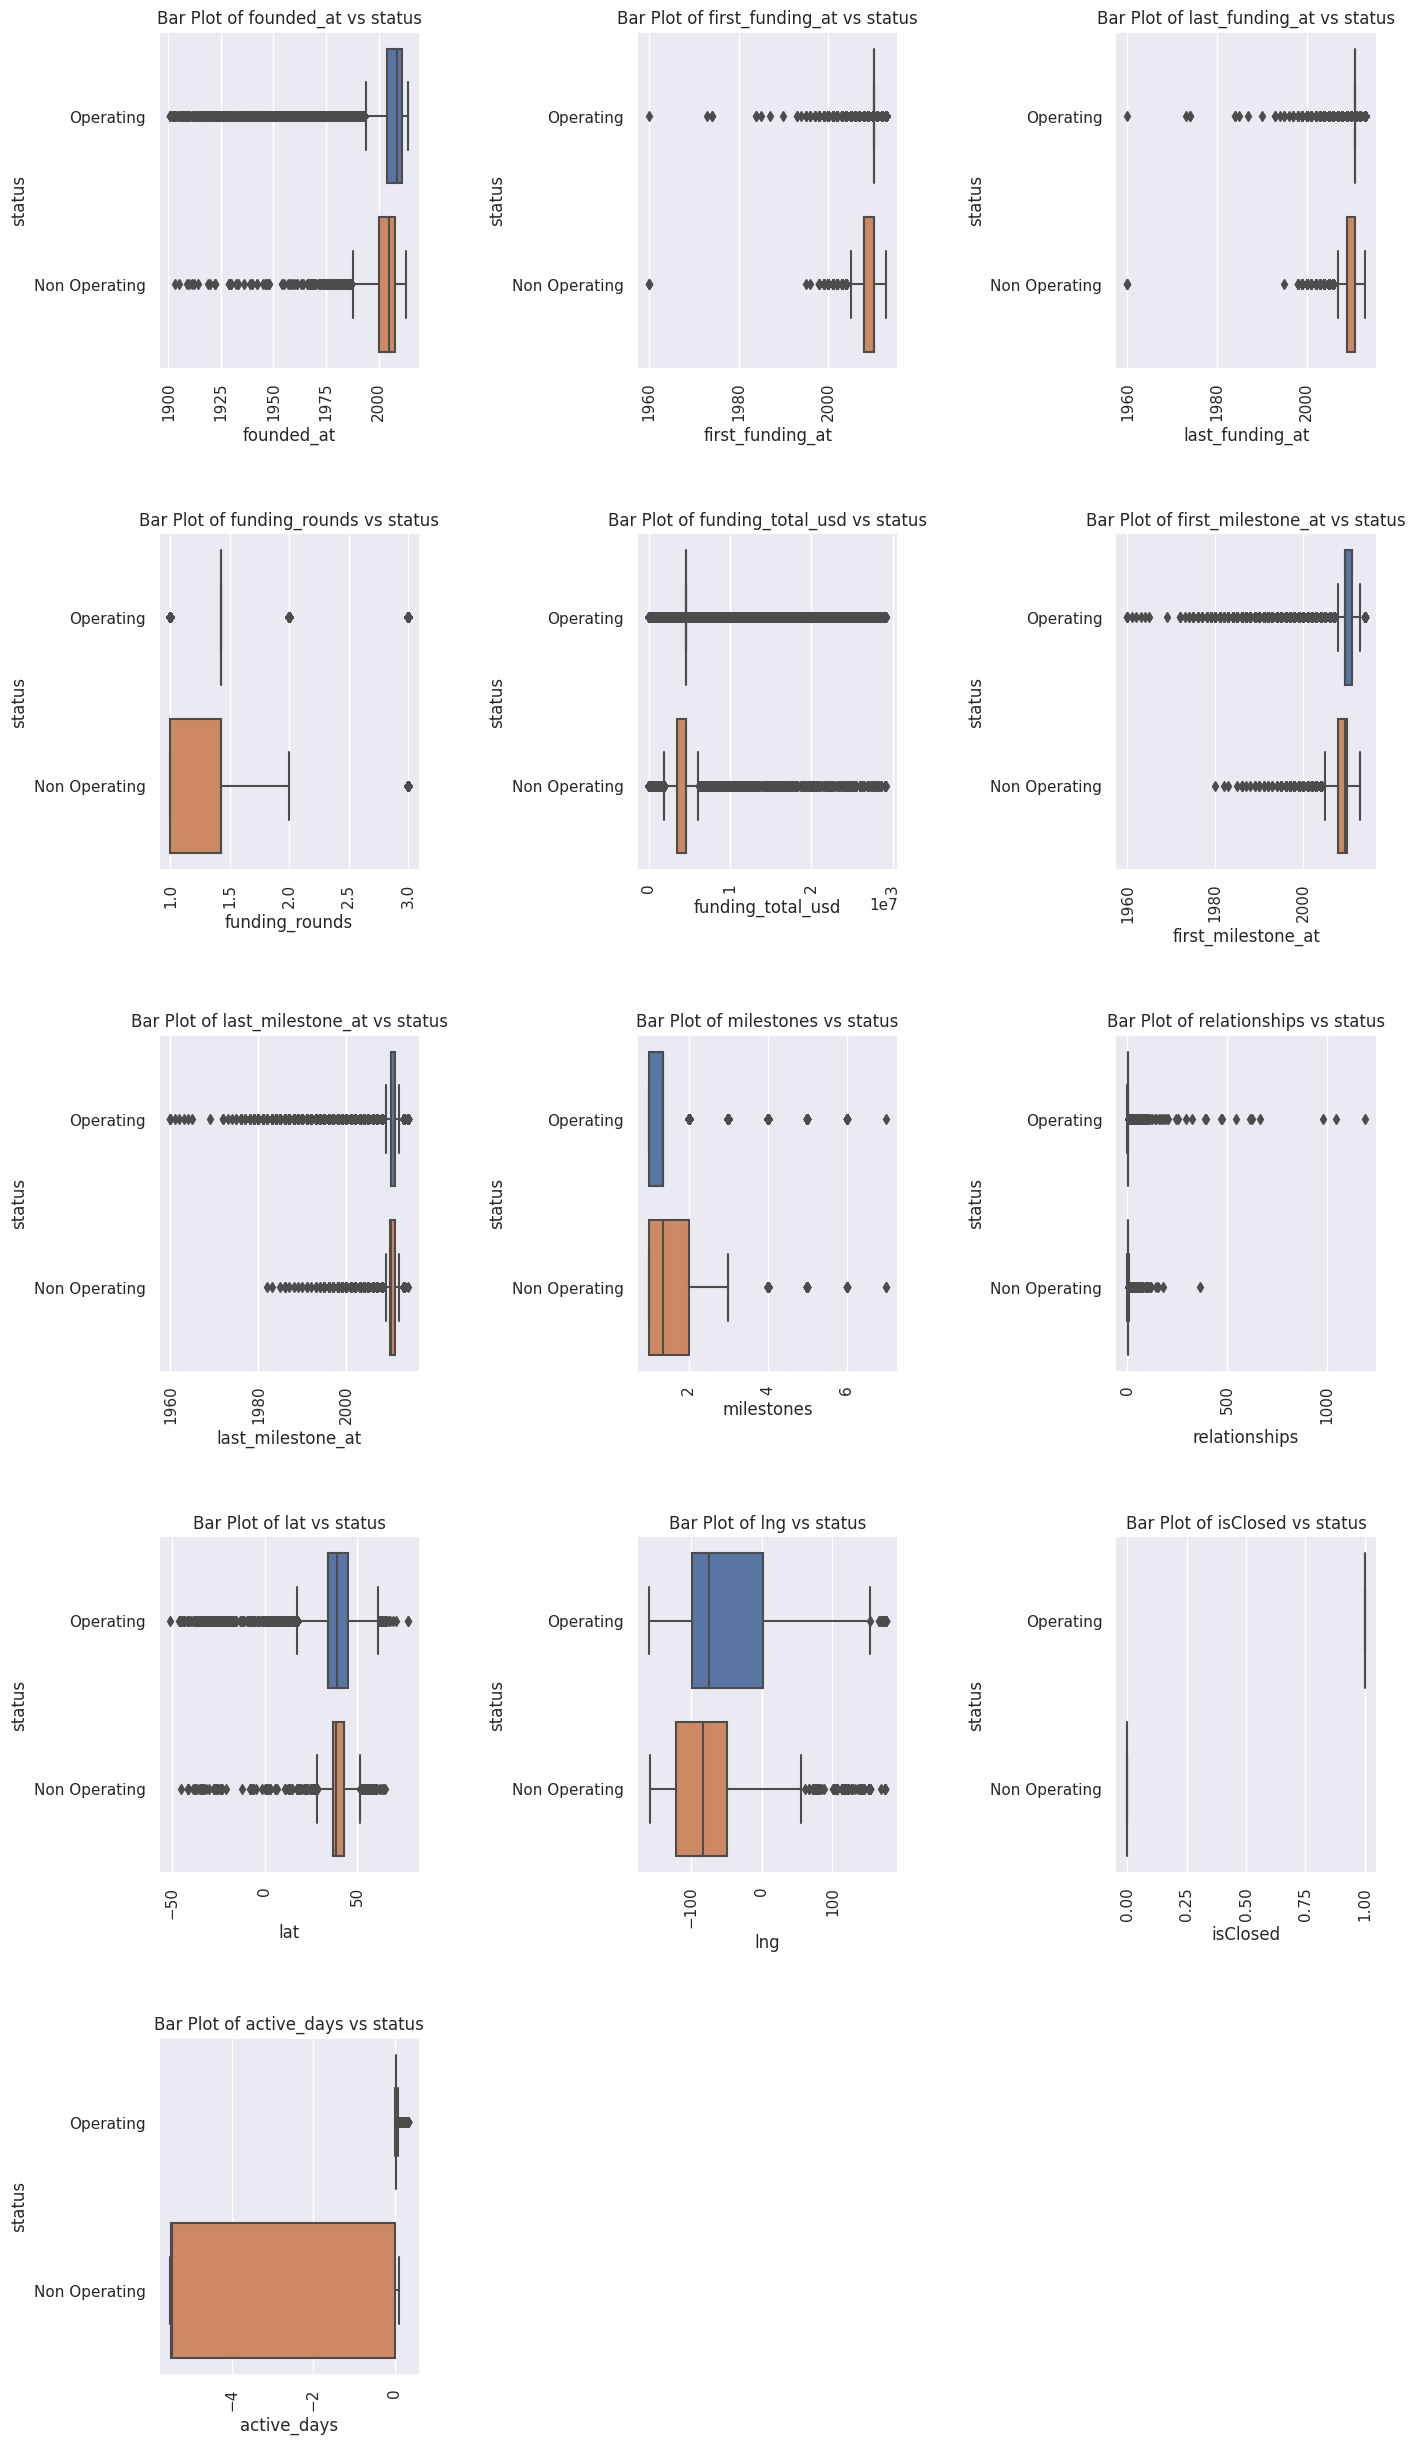

In [ ]:
plt.figure(figsize=[15, 30])
for idx, column in enumerate(df_train_excluded, start=1):
  plt.subplot(6, 3, idx)
  sns.boxplot(x=df_train[column], y=df_train['status'])
  plt.xlabel(f'{column}')
  plt.ylabel('status')
  plt.title(f'Bar Plot of {column} vs status')
  plt.xticks(rotation=90)
  plt.tight_layout(pad=4)
plt.show()

### Multivariate Analysis

#### Heatmap

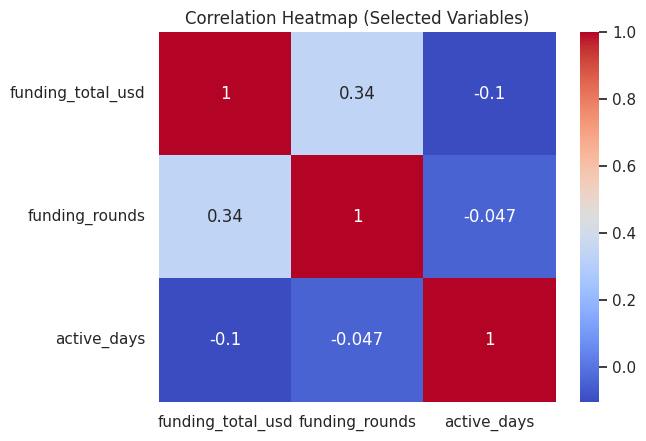

In [ ]:
# Create a heatmap for selected numerical variables
selected_vars = ['funding_total_usd', 'funding_rounds', 'active_days']
selected_corr_matrix = df_train[selected_vars].corr()
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Selected Variables)')
plt.show()

Regression Analysis

In [ ]:
from sklearn.linear_model import LinearRegression

# Fit a multiple linear regression model
X = df_train_excluded[['funding_total_usd', 'funding_rounds']]
y = df_train_excluded['active_days']
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Intercept: -0.038054511532485236
Coefficients: [-3.80294724e-08 -4.64255156e-02]


PCA

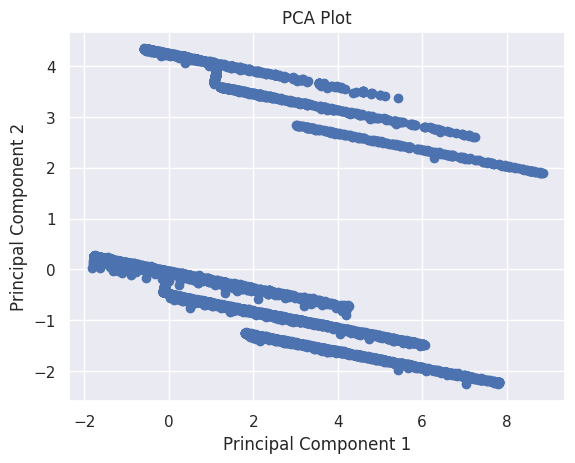

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the numerical variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_train_excluded[['funding_total_usd', 'funding_rounds', 'active_days']])

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Plot the PCA results
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()


Cluster Analysis(K-Means)

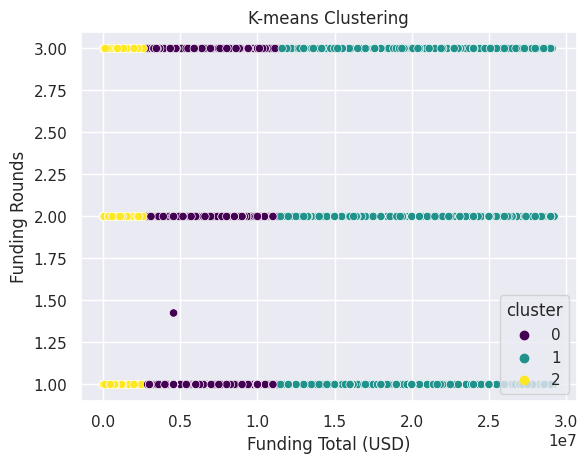

In [ ]:
from sklearn.cluster import KMeans

# Fit a K-means clustering model
X = df_train_excluded[['funding_total_usd', 'funding_rounds']]
kmeans = KMeans(n_clusters=3)
df_train_excluded['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
sns.scatterplot(data=df_train_excluded, x='funding_total_usd', y='funding_rounds', hue='cluster', palette='viridis')
plt.xlabel('Funding Total (USD)')
plt.ylabel('Funding Rounds')
plt.title('K-means Clustering')
plt.show()

Annova Test

In [ ]:
import pandas as pd
import scipy.stats as stats

# Perform one-way ANOVA
grouped_data = [group['funding_total_usd'] for name, group in df_train.groupby('funding_rounds')]
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'p-value: {p_value}')

# Interpret the results
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference between groups.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference between groups.')


F-statistic: 2616.8430903091926
p-value: 0.0
Reject the null hypothesis: There is a significant difference between groups.
